## Loading libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Deep learning results

In [2]:
#Loading the files with all fidelities for creating the graph of deep learning model scaling on dataset size
DNN_fidelity_val_tensor = np.load("Dataset_files/DNN_all_fidelity_val_tensor.npy", allow_pickle=True)
DNN_fidelity_test_tensor = np.load("Dataset_files/DNN_all_fidelity_test_tensor.npy", allow_pickle=True)

#The files are divided to 11 parts, one for each point of the graph
graph_points = DNN_fidelity_val_tensor.shape[0]

test_fidelity_arrays = []

#Now we go through each part one by one
for i in range(graph_points):
    #Extract one part, it is a matrix of a size (number_of_training_subsets, validation_set_size)
    fidelity_matrix = np.real(DNN_fidelity_val_tensor[i])
    
    #Calculate the mean fidelity across the validation set for each training subset
    networks_means = np.mean(fidelity_matrix, axis=1)
    
    #Find the training subset with highest fidelity on the validation set
    pos_val_max = np.argmax(networks_means)
    
    #Pick the test fidelities of the training subset that was best for the validation set
    test_fidelity_arrays.append(np.real(DNN_fidelity_test_tensor[i])[pos_val_max])

#Now the "test_fidelity_arrays" is a matrix of fidelities with a shape (graph_points, test_set_size)

#Calculating the mean infidelity for each graph point
DNN_infidelities = 1-np.array(test_fidelity_arrays)
DNN_infidelity_means = np.mean(DNN_infidelities, axis=-1)

## Linear interpolation results

In [3]:
#Loading the files with all fidelities for creating the graph of linear interpolation model scaling on dataset size
LI_fidelity_val_tensor = np.load("Dataset_files/LI_all_fidelity_val_tensor.npy", allow_pickle=True)
LI_fidelity_test_tensor = np.load("Dataset_files/LI_all_fidelity_test_tensor.npy", allow_pickle=True)

#The files are divided to 11 parts, one for each point of the graph
graph_points = LI_fidelity_val_tensor.shape[0]

test_fidelity_arrays = []

#Now we go through each part one by one
for i in range(graph_points):
    #Extract one part, it is a matrix of a size (number_of_training_subsets, validation_set_size)
    fidelity_matrix = np.real(LI_fidelity_val_tensor[i])
    
    #Calculate the mean fidelity across the validation set for each training subset
    networks_means = np.mean(fidelity_matrix, axis=1)
    
    #Find the training subset with highest fidelity on the validation set
    pos_val_max = np.argmax(networks_means)
    
    #Pick the test fidelities of the training subset that was best for the validation set
    test_fidelity_arrays.append(np.real(LI_fidelity_test_tensor[i])[pos_val_max])
    
#Now the "test_fidelity_arrays" is a matrix of fidelities with a shape (graph_points, test_set_size)

#Calculating the mean infidelity for each graph point
LI_infidelities = 1-np.array(test_fidelity_arrays)
LI_infidelity_means = np.mean(LI_infidelities, axis=-1)

## Radial basis function interpolation

In [4]:
#Loading the files with all fidelities for creating the graph of linear interpolation model scaling on dataset size
RBF_fidelity_val_tensor = np.load("Dataset_files/RBF_all_fidelity_val_tensor.npy", allow_pickle=True)
RBF_fidelity_test_tensor = np.load("Dataset_files/RBF_all_fidelity_test_tensor.npy", allow_pickle=True)

#The files are divided to 11 parts, one for each point of the graph
graph_points = RBF_fidelity_val_tensor.shape[0]

test_fidelity_arrays = []

#Now we go through each part one by one
for i in range(graph_points):
    #Extract one part, it is a matrix of a size (number_of_training_subsets, validation_set_size)
    fidelity_matrix = np.real(RBF_fidelity_val_tensor[i])
    
    #Calculate the mean fidelity across the validation set for each training subset
    networks_means = np.mean(fidelity_matrix, axis=1)
    
    #Find the training subset with highest fidelity on the validation set
    pos_val_max = np.argmax(networks_means)
    
    #Pick the test fidelities of the training subset that was best for the validation set
    test_fidelity_arrays.append(np.real(RBF_fidelity_test_tensor[i])[pos_val_max])
    
#Now the "test_fidelity_arrays" is a matrix of fidelities with a shape (graph_points, test_set_size)

#Calculating the mean infidelity for each graph point
RBF_infidelities = 1-np.array(test_fidelity_arrays)
RBF_infidelity_means = np.mean(RBF_infidelities, axis=-1)

## Figure visualization

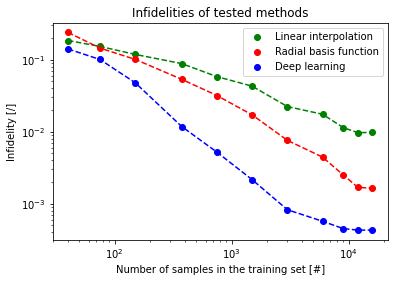

In [5]:
dataset_size_array = np.array([40, 75, 150, 375, 750, 1500, 3000, 6000, 9000, 12000, 16000])

plt.figure(figsize=(6,4))
plt.plot(dataset_size_array, LI_infidelity_means, 
         color="green", linestyle="--")
plt.scatter(dataset_size_array, LI_infidelity_means, 
            color="green", label="Linear interpolation")

plt.plot(dataset_size_array, RBF_infidelity_means, 
         color="red", linestyle="--")
plt.scatter(dataset_size_array, RBF_infidelity_means, 
            color="red", label="Radial basis function")

plt.plot(dataset_size_array, DNN_infidelity_means, 
         color="blue", linestyle="--")
plt.scatter(dataset_size_array, DNN_infidelity_means, 
            color="blue", label="Deep learning")

plt.xscale("log")
plt.yscale("log")
plt.title("Infidelities of tested methods")
plt.ylabel('Infidelity [/]')
plt.xlabel('Number of samples in the training set [#]')
plt.legend()